In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
input_datapath = "/content/drive/MyDrive/msc_work/marketing_new_data.csv"
trans_data = pd.read_csv(input_datapath, index_col=0)

In [ ]:
trans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID
INDEX,,,,,,,,,,,,,,,,,,
1,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,C10002
1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,C10003
1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,C10004
1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,C10005


In [ ]:
# Initialize VarianceThreshold
selector_variance = VarianceThreshold(threshold=(.8 * (1 - .8)))  # Example threshold

# Fit and transform the data
X_new_variance = selector_variance.fit_transform(trans_data.drop("CUST_ID", axis=1, inplace=True))

# Get the selected feature names
selected_features_variance = trans_data.columns[selector_variance.get_support()]

# Convert the result back to DataFrame (optional)
df_selected_features_variance = pd.DataFrame(X_new_variance, columns=selected_features_variance)

print("Selected features by VarianceThreshold:", selected_features_variance.tolist())

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
trans_data_features = trans_data[['PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']]

In [ ]:
trans_data_features.isna().sum()

PURCHASES_FREQUENCY    0
PRC_FULL_PAYMENT       0
TENURE                 0
dtype: int64

In [ ]:
trans_data_features.shape

(8950, 3)

In [ ]:
trans_data_features["CREDIT_LIMIT"].fillna(0, inplace=True)

<ipython-input-15-0cf384b1d041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_data_features["CREDIT_LIMIT"].fillna(0, inplace=True)


In [ ]:
trans_data_features.isna().sum()

BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_FREQUENCY       0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

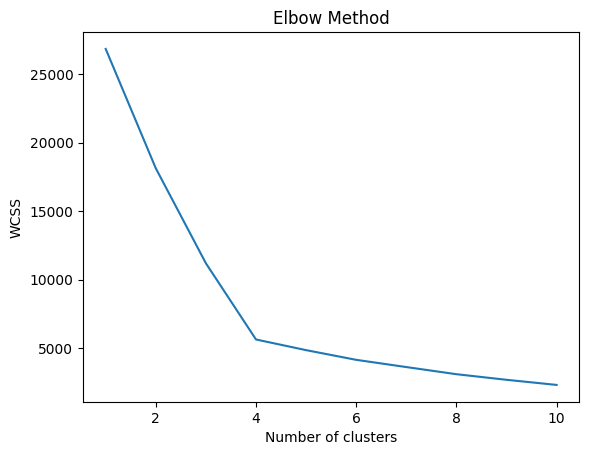

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(trans_data_features)

# Step 3: Apply the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_features_scaled)
    wcss.append(kmeans.inertia_)

# Step 4: Plotting to find the elbow point
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

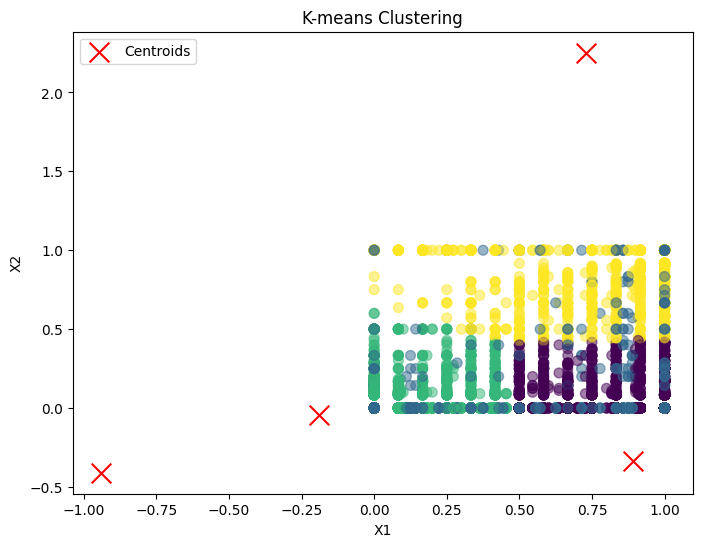

In [ ]:
num_clusters = 4

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(df_features_scaled)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
# plt.scatter(df_features_scaled['PURCHASES_FREQUENCY'], df_features_scaled['PRC_FULL_PAYMENT'], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(trans_data_features['PURCHASES_FREQUENCY'], trans_data_features['PRC_FULL_PAYMENT'], c=labels, cmap='viridis', s=50, alpha=0.5)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=0).fit(df_features_scaled)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_features_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

# Get cluster labels
labels = cluster.labels_

# Visualize the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(df['X1'], df['X2'], c=labels, cmap='viridis', s=50, alpha=0.5)
# plt.title('Hierarchical Clustering')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 1000x600 with 0 Axes>

In [ ]:
trans_data['Loyalty_Category'] = kmeans.labels_

# Optionally, you might want to map numeric clusters to categorical labels
loyalty_mapping = {0: 'Bronze', 1: 'Silver', 2: 'Gold', 3: 'Platinum'}
trans_data['Loyalty_Category'] = trans_data['Loyalty_Category'].map(loyalty_mapping)
trans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CUST_ID,Loyalty_Category
INDEX,,,,,,,,,,,,,,,,,,,
1,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,C10001,Gold
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,C10002,Gold
1,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,C10003,Bronze
1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,C10004,Gold
1,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,C10005,Gold


In [ ]:
trans_data.shape

(8950, 19)

In [ ]:
trans_data["CUST_ID"].nunique()

8950

In [43]:
input_datapath = "/content/drive/MyDrive/msc_work/Groceries_dataset.csv"
grocery_data = pd.read_csv(input_datapath, index_col=0)

In [44]:
grocery_data.head()

,Date,itemDescription,CUST_ID
Member_number,,,
1808,21-07-2015,tropical fruit,C14298
2552,5/1/2015,whole milk,C13668
2300,19-09-2015,pip fruit,C14585
1187,12/12/2015,other vegetables,C17417
3037,1/2/2015,whole milk,C11767


In [47]:
final_trans_data = trans_data[["CUST_ID", "Loyalty_Category"]]

In [48]:
final_trans_data.head()

,CUST_ID,Loyalty_Category
INDEX,,
1,C10001,Gold
1,C10002,Gold
1,C10003,Bronze
1,C10004,Gold
1,C10005,Gold


In [49]:
grocery_join_result = pd.merge(grocery_data, final_trans_data, on='CUST_ID', how='left')

In [50]:
grocery_join_result.head()

,Date,itemDescription,CUST_ID,Loyalty_Category
0,21-07-2015,tropical fruit,C14298,Bronze
1,5/1/2015,whole milk,C13668,Bronze
2,19-09-2015,pip fruit,C14585,Silver
3,12/12/2015,other vegetables,C17417,Gold
4,1/2/2015,whole milk,C11767,Platinum


Platinum_customers

In [52]:
platinum_cust = grocery_join_result[grocery_join_result["Loyalty_Category"] == "Platinum"]

In [54]:
platinum_cust.shape

(5220, 4)

In [56]:
try:
    import apyori
except:
    !pip install apyori

from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=26b899d611437fbbac03869a78adcfd8c72e35db74f2554b23d96d6090d253dd
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [66]:
groceries_time = pd.DataFrame(platinum_cust.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = platinum_cust.groupby('Date')['CUST_ID'].nunique().values
groceries_time['items_count'] = platinum_cust.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = platinum_cust.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
1/1/2014,18,14,"[citrus fruit, hamburger meat, butter, yogurt,..."
1/1/2015,20,17,"[frozen meals, butter, citrus fruit, whole mil..."
1/10/2014,17,16,"[rolls/buns, citrus fruit, whole milk, beef, y..."
1/10/2015,20,13,"[citrus fruit, other vegetables, white bread, ..."
1/11/2014,17,12,"[other vegetables, whole milk, rolls/buns, fru..."


In [67]:
transactions = groceries_time['items'].tolist()

In [68]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,abrasive cleaner,0.001374,0.034483,4.183908
1,Instant food products,cocoa drinks,0.001374,0.034483,5.020690
2,Instant food products,curd cheese,0.004121,0.103448,5.793103
3,Instant food products,liqueur,0.001374,0.034483,4.183908
4,Instant food products,mayonnaise,0.004121,0.103448,3.137931


In [69]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
447,liqueur,preservation products,0.001374,0.166667,121.333333
257,decalcifier,specialty vegetables,0.001374,0.500000,121.333333
50,bags,frozen fruits,0.001374,0.500000,72.800000
197,cocoa drinks,rubbing alcohol,0.001374,0.200000,48.533333
530,preservation products,spices,0.001374,1.000000,38.315789
561,rubbing alcohol,syrup,0.001374,0.333333,30.333333
248,curd cheese,whisky,0.001374,0.076923,28.000000
57,bags,rum,0.001374,0.500000,24.266667
41,baby cosmetics,condensed milk,0.001374,1.000000,23.483871
356,frozen fruits,skin care,0.001374,0.200000,20.800000


Gold Customers

In [61]:
gold_cust = grocery_join_result[grocery_join_result["Loyalty_Category"] == "Gold"]

In [62]:
groceries_time = pd.DataFrame(gold_cust.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = gold_cust.groupby('Date')['CUST_ID'].nunique().values
groceries_time['items_count'] = gold_cust.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = gold_cust.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
1/1/2014,18,14,"[citrus fruit, hamburger meat, butter, yogurt,..."
1/1/2015,20,17,"[frozen meals, butter, citrus fruit, whole mil..."
1/10/2014,17,16,"[rolls/buns, citrus fruit, whole milk, beef, y..."
1/10/2015,20,13,"[citrus fruit, other vegetables, white bread, ..."
1/11/2014,17,12,"[other vegetables, whole milk, rolls/buns, fru..."


In [63]:
transactions = groceries_time['items'].tolist()

In [64]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)

def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,abrasive cleaner,0.001374,0.034483,4.183908
1,Instant food products,cocoa drinks,0.001374,0.034483,5.020690
2,Instant food products,curd cheese,0.004121,0.103448,5.793103
3,Instant food products,liqueur,0.001374,0.034483,4.183908
4,Instant food products,mayonnaise,0.004121,0.103448,3.137931


In [65]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
447,liqueur,preservation products,0.001374,0.166667,121.333333
257,decalcifier,specialty vegetables,0.001374,0.500000,121.333333
50,bags,frozen fruits,0.001374,0.500000,72.800000
197,cocoa drinks,rubbing alcohol,0.001374,0.200000,48.533333
530,preservation products,spices,0.001374,1.000000,38.315789
561,rubbing alcohol,syrup,0.001374,0.333333,30.333333
248,curd cheese,whisky,0.001374,0.076923,28.000000
57,bags,rum,0.001374,0.500000,24.266667
41,baby cosmetics,condensed milk,0.001374,1.000000,23.483871
356,frozen fruits,skin care,0.001374,0.200000,20.800000
